## 1. zadatak

Analizirati **magnetno polje Sunca** – dat je **FITS fajl** u repozitorijumu.

- Plotovati čitavu mapu magnetnog polja  
- Prikazati **histogram magnetnog polja**  
- Izračunati **srednju vrijednost**, **standardnu devijaciju**, **medijanu**, **iskošenost** i **zašiljenost** (za raspodjelu koja prati taj histogram)  
- Uporediti histogram sa **gausijanom**  
- Izdvojiti **10% piksela** sa najvećim apsolutnim vrijednostima magnetnog polja  
- Izračunati statistiku za ovaj podskup (**srednja vrijednost**, **medijana**, **standardna devijacija**)  
- Uporediti statističke mjere izdvojenih piksela sa statistikom cjelokupne mape  
- Uporediti histogram ovog podskupa sa **gausijanom** i provjeriti da li postoje značajna odstupanja  
- Kreirati **profil magnetnog polja** duž **centralne horizontalne** i **vertikalne linije**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.stats import norm, skew, kurtosis


In [4]:
# Učitavanje FITS fajla
def load_fits(filename):
    with fits.open(filename) as hdul:
        data = hdul[0].data
    return data

In [5]:
# Učitavanje podataka
fits_file = "magnetic_field_sun.fits"
data = load_fits(fits_file)


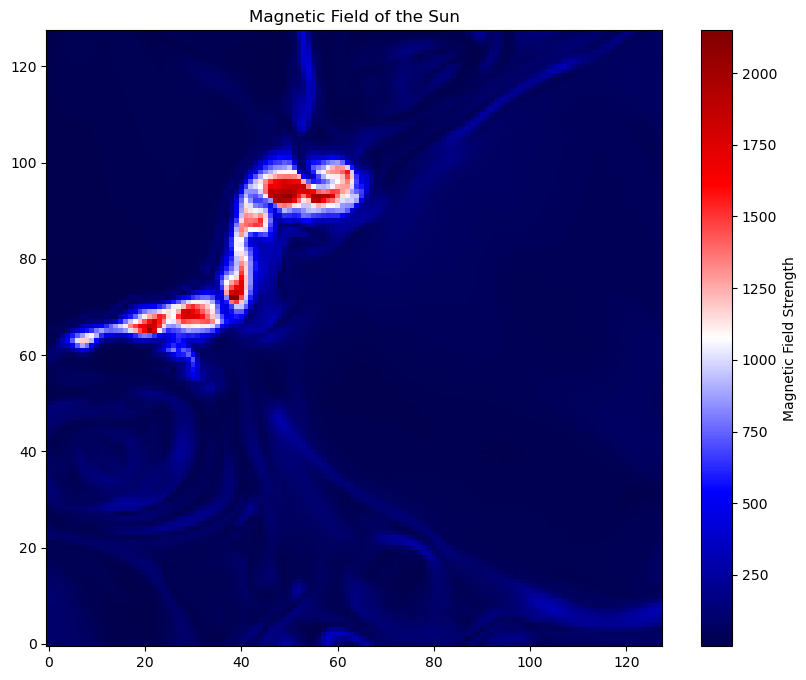

In [9]:
# Plot cijele mape magnetnog polja
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='seismic', origin='lower')
plt.colorbar(label='Magnetic Field Strength')
plt.title('Magnetic Field of the Sun')
plt.savefig("Magnetic Field of the  Sun.png")
plt.show()

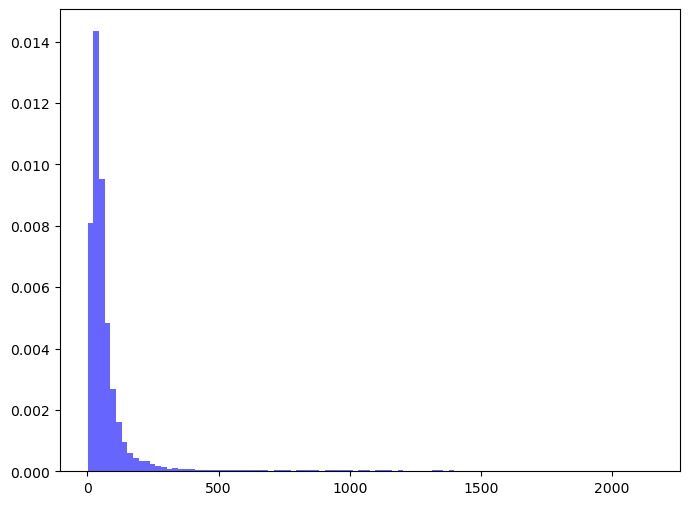

In [10]:
# Histogram magnetnog polja
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(data.flatten(), bins=100, density=True, alpha=0.6, color='blue')


In [12]:
# Izračunavanje statistika
mean_val = np.mean(data)
std_val = np.std(data)
median_val = np.median(data)
skewness_val = skew(data.flatten())
kurtosis_val = kurtosis(data.flatten())

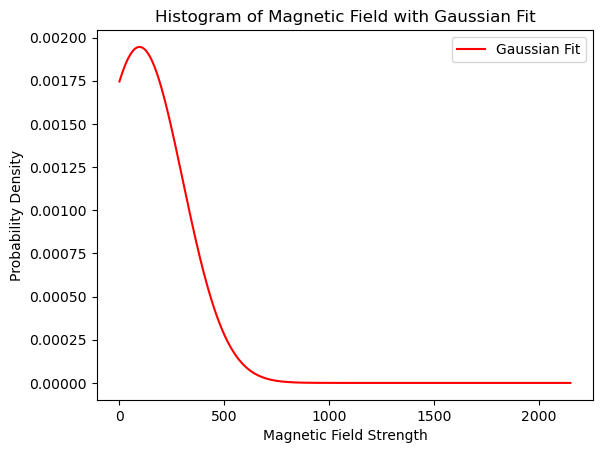

In [14]:
# Gaussova raspodjela za poređenje
x = np.linspace(min(bins), max(bins), 1000)
pdf = norm.pdf(x, mean_val, std_val)
plt.plot(x, pdf, 'r', label='Gaussian Fit')
plt.legend()
plt.xlabel('Magnetic Field Strength')
plt.ylabel('Probability Density')
plt.title('Histogram of Magnetic Field with Gaussian Fit')
plt.show()

In [16]:
# 10% piksela sa najvećim apsolutnim vrijednostima
threshold = np.percentile(np.abs(data), 90)
high_field_pixels = data[np.abs(data) >= threshold]

In [18]:
# Statistika za podskup
mean_high = np.mean(high_field_pixels)
median_high = np.median(high_field_pixels)
std_high = np.std(high_field_pixels)


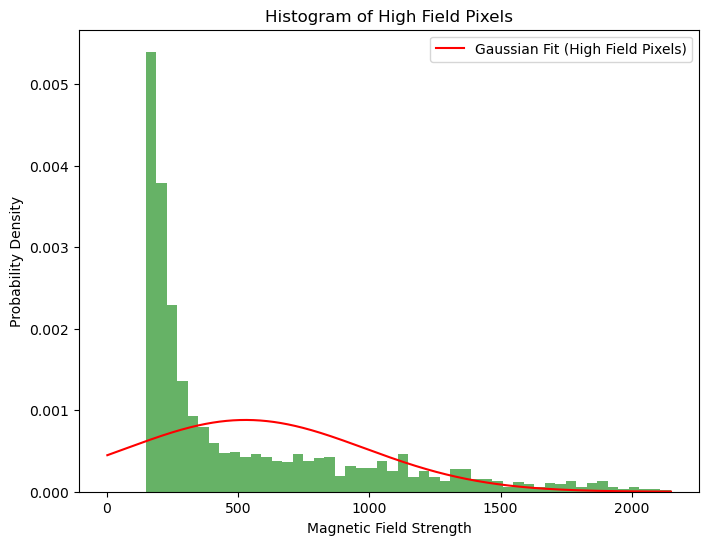

In [20]:
# Histogram podskupa
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(high_field_pixels, bins=50, density=True, alpha=0.6, color='green')
pdf_high = norm.pdf(x, mean_high, std_high)
plt.plot(x, pdf_high, 'r', label='Gaussian Fit (High Field Pixels)')
plt.legend()
plt.xlabel('Magnetic Field Strength')
plt.ylabel('Probability Density')
plt.title('Histogram of High Field Pixels')
plt.show()


In [22]:
# Profil magnetnog polja duž centralnih linija
center_x = data.shape[1] // 2
center_y = data.shape[0] // 2


In [24]:
horizontal_profile = data[center_y, :]
vertical_profile = data[:, center_x]

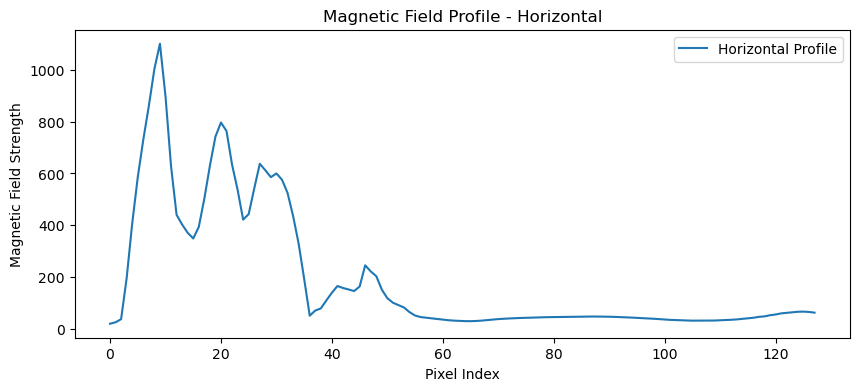

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(horizontal_profile, label='Horizontal Profile')
plt.xlabel('Pixel Index')
plt.ylabel('Magnetic Field Strength')
plt.title('Magnetic Field Profile - Horizontal')
plt.legend()
plt.show()

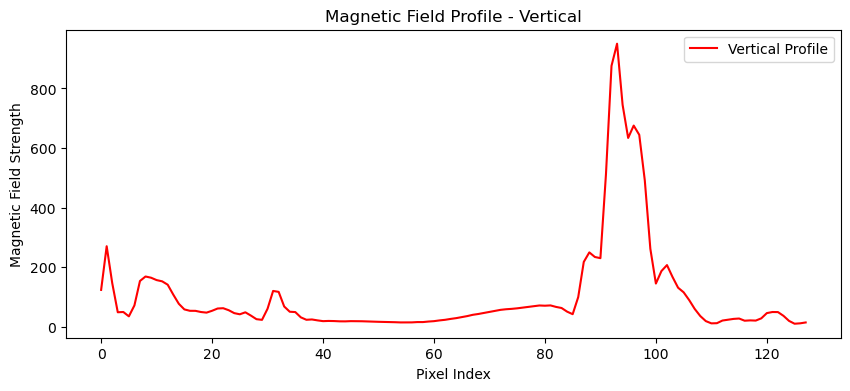

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(vertical_profile, label='Vertical Profile', color='red')
plt.xlabel('Pixel Index')
plt.ylabel('Magnetic Field Strength')
plt.title('Magnetic Field Profile - Vertical')
plt.legend()
plt.show()

In [30]:
# Ispis rezultata
print(f"Mean: {mean_val}, Std Dev: {std_val}, Median: {median_val}, Skewness: {skewness_val}, Kurtosis: {kurtosis_val}")
print(f"Subset (Top 10%) - Mean: {mean_high}, Median: {median_high}, Std Dev: {std_high}")


Mean: 96.68126678466797, Std Dev: 205.0286102294922, Median: 45.426666259765625, Skewness: 5.489817987627117, Kurtosis: 34.22490693608943
Subset (Top 10%) - Mean: 527.900634765625, Median: 296.47406005859375, Std Dev: 453.1880798339844
